# Классификация или регрессия: Анализ набора данных
### 1. Загрузка и предварительный анализ данных

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import (mean_squared_error, r2_score, 
                             accuracy_score, confusion_matrix, 
                             classification_report, roc_auc_score)
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Загрузка данных
hr_data = pd.read_csv("HR_Data.csv")

# Просмотр первых строк датасета
hr_data.head()

# Основная информация о данных
hr_data.info()

# Статистическое описание числовых признаков
hr_data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmpID                    1473 non-null   object 
 1   Age                      1473 non-null   int64  
 2   AgeGroup                 1473 non-null   object 
 3   Attrition                1473 non-null   object 
 4   BusinessTravel           1473 non-null   object 
 5   Department               1473 non-null   object 
 6   DistanceFromHome         1473 non-null   int64  
 7   EducationField           1473 non-null   object 
 8   EnvironmentSatisfaction  1473 non-null   object 
 9   Gender                   1473 non-null   object 
 10  JobLevel                 1473 non-null   int64  
 11  JobRole                  1473 non-null   object 
 12  JobSatisfaction          1473 non-null   object 
 13  MaritalStatus            1473 non-null   object 
 14  MonthlyIncome           

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,...,MonthlyIncome,Over18,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1473,1473.000000,1473,1473,1473,1473,1473.000000,1473,1473,1473,...,1473.000000,1473,1473,1473.000000,1473,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000
unique,1470,NaN,5,2,3,3,NaN,6,3,2,...,NaN,1,2,NaN,2,NaN,NaN,NaN,NaN,NaN
top,RM1465,NaN,26-35,No,Travel_Rarely,Research & Development,NaN,Life Sciences,Poor,Male,...,NaN,Y,No,NaN,Average,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,607,1236,1045,963,NaN,606,571,884,...,NaN,1473,1057,NaN,1247,NaN,NaN,NaN,NaN,NaN
mean,NaN,36.917176,NaN,NaN,NaN,NaN,9.196877,NaN,NaN,NaN,...,6500.228785,NaN,NaN,15.212492,NaN,11.277665,7.004752,4.228106,2.183978,4.073999
std,NaN,9.130690,NaN,NaN,NaN,NaN,8.107754,NaN,NaN,NaN,...,4706.053923,NaN,NaN,3.657230,NaN,7.776228,6.121004,3.621096,3.220301,3.496401
min,NaN,18.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,1009.000000,NaN,NaN,11.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,30.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,...,2911.000000,NaN,NaN,12.000000,NaN,6.000000,3.000000,2.000000,0.000000,2.000000
50%,NaN,36.000000,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,...,4908.000000,NaN,NaN,14.000000,NaN,10.000000,5.000000,3.000000,1.000000,3.000000
75%,NaN,43.000000,NaN,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,...,8380.000000,NaN,NaN,18.000000,NaN,15.000000,9.000000,7.000000,3.000000,7.000000


### 2. Предобработка данных

##### 2.1. Обработка пропущенных значений

In [2]:
# Анализ пропущенных значений
print("Пропущенные значения до обработки:")
print(hr_data.isnull().sum())

# Заполнение пропусков (если есть)
# Например, для числовых признаков медианой, для категориальных - модой
numeric_cols = hr_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = hr_data.select_dtypes(include=['object']).columns

for col in numeric_cols:
    if hr_data[col].isnull().sum() > 0:
        hr_data[col] = hr_data[col].fillna(hr_data[col].median())

for col in categorical_cols:
    if hr_data[col].isnull().sum() > 0:
        hr_data[col] = hr_data[col].fillna(hr_data[col].mode()[0])

# Проверка, что пропусков больше нет
print("\nПропущенные значения после обработки:")
print(hr_data.isnull().sum().sum())  # Должно быть 0

Пропущенные значения до обработки:
EmpID                      0
Age                        0
AgeGroup                   0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
Over18                     0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
TotalWorkingYears          0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

Пропущенные значения после обработки:
0


##### 2.2. Кодирование категориальных признаков и выбор признаков

In [3]:
# Удалим ненужные столбцы (если есть)
hr_data = hr_data.drop(['EmpID', 'Over18'], axis=1)  # ID и константные признаки

# Выберем признаки для модели
target = 'Attrition'
features = [col for col in hr_data.columns if col != target]

X = hr_data[features]
y = hr_data[target]

# Разделим признаки на числовые и категориальные
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Создаем преобразователь колонок
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Применяем преобразования
X_processed = preprocessor.fit_transform(X)

### 3. Разделение данных на обучающую и тестовую выборки

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train size: {X_train.shape[0]}")
print(f"Test size: {X_test.shape[0]}")

Train size: 1178
Test size: 295


### 4. Обучение моделей

##### 4.1 Логистическая регрессия (для классификации)

In [5]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Предсказания
y_pred_logreg = logreg.predict(X_test)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]

# Оценка качества
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob_logreg):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression:
Accuracy: 0.8915
AUC-ROC: 0.8584

Classification Report:
              precision    recall  f1-score   support

          No       0.91      0.97      0.94       248
         Yes       0.76      0.47      0.58        47

    accuracy                           0.89       295
   macro avg       0.83      0.72      0.76       295
weighted avg       0.88      0.89      0.88       295



##### 4.2 Метод опорных векторов (SVM)

In [6]:
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)

# Предсказания
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]

# Оценка качества
print("SVM:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob_svm):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

SVM:
Accuracy: 0.8847
AUC-ROC: 0.8489

Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.99      0.94       248
         Yes       0.88      0.32      0.47        47

    accuracy                           0.88       295
   macro avg       0.88      0.66      0.70       295
weighted avg       0.88      0.88      0.86       295



##### 4.3 Дерево решений

In [7]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

# Предсказания
y_pred_tree = tree.predict(X_test)
y_prob_tree = tree.predict_proba(X_test)[:, 1]

# Оценка качества
print("Decision Tree:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob_tree):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))

Decision Tree:
Accuracy: 0.8576
AUC-ROC: 0.7279

Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.99      0.92       248
         Yes       0.73      0.17      0.28        47

    accuracy                           0.86       295
   macro avg       0.79      0.58      0.60       295
weighted avg       0.84      0.86      0.82       295



### 5. Сравнение моделей

In [8]:
models = ['Logistic Regression', 'SVM', 'Decision Tree']
accuracy = [accuracy_score(y_test, y_pred_logreg), 
            accuracy_score(y_test, y_pred_svm), 
            accuracy_score(y_test, y_pred_tree)]
auc = [roc_auc_score(y_test, y_prob_logreg), 
       roc_auc_score(y_test, y_prob_svm), 
       roc_auc_score(y_test, y_prob_tree)]

comparison = pd.DataFrame({'Model': models, 'Accuracy': accuracy, 'AUC-ROC': auc})
comparison.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,AUC-ROC
0,Logistic Regression,0.891525,0.858442
1,SVM,0.884746,0.848919
2,Decision Tree,0.857627,0.727908


### 6. Анализ важности признаков в дереве решений

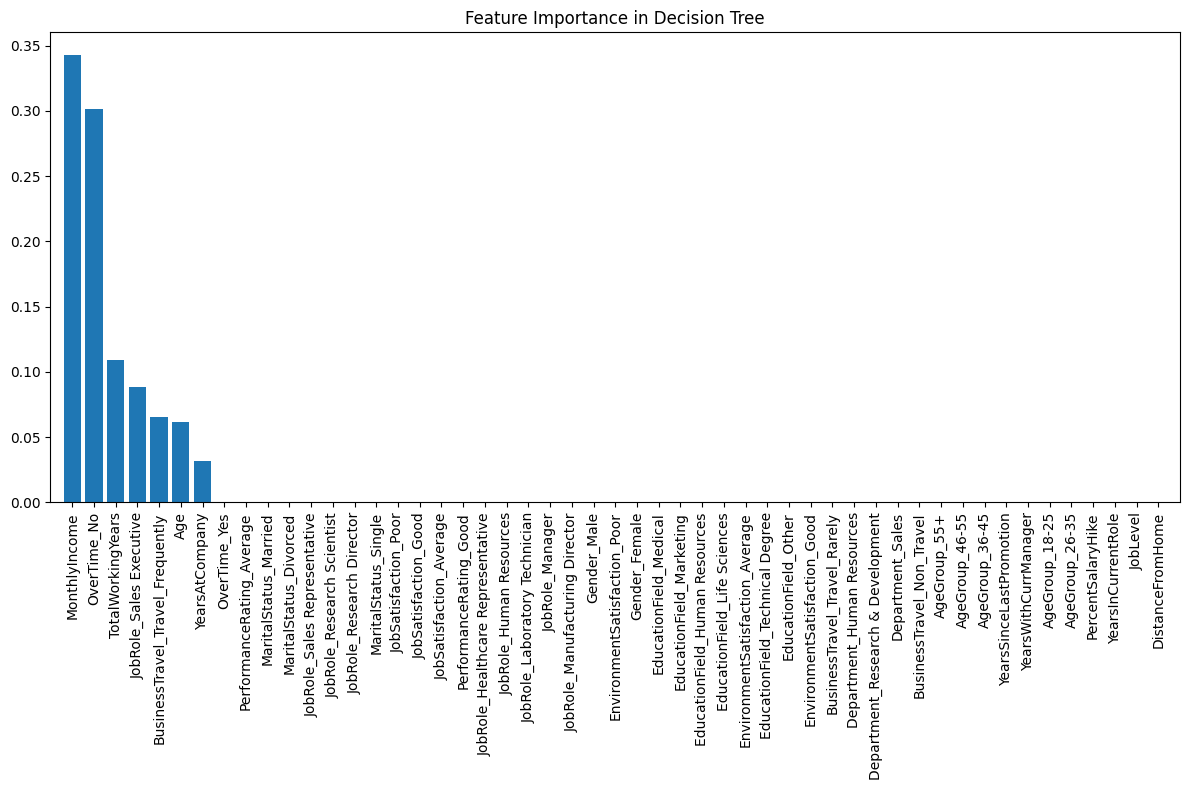

In [9]:
# Получаем имена признаков после OneHot кодирования
feature_names = (preprocessor.named_transformers_['cat']
                 .get_feature_names_out(input_features=categorical_features))
feature_names = np.concatenate([
    numeric_features,  # числовые признаки
    feature_names
])

# Важность признаков
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]

# График важности признаков
plt.figure(figsize=(12, 8))
plt.title("Feature Importance in Decision Tree")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

### 7. Визуализация дерева решений

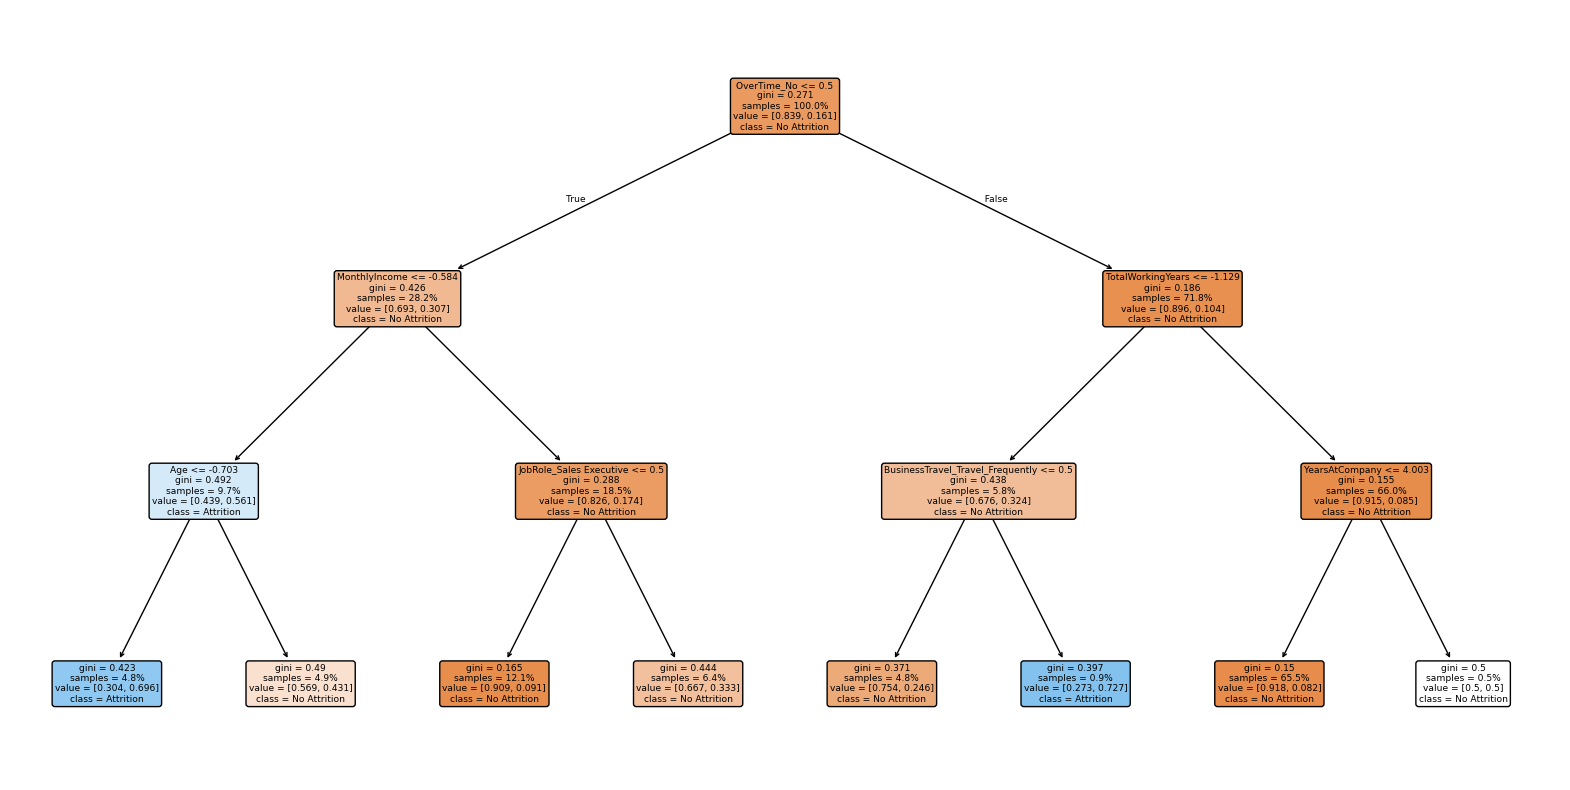

In [10]:
plt.figure(figsize=(20, 10))
plot_tree(tree, 
          feature_names=feature_names, 
          class_names=['No Attrition', 'Attrition'], 
          filled=True, 
          rounded=True, 
          proportion=True)
plt.show()

### 8. Вывод правил дерева решений в текстовом виде

In [12]:
from sklearn.tree import export_text

tree_rules = export_text(tree, feature_names=list(feature_names))
print(tree_rules)

|--- OverTime_No <= 0.50
|   |--- MonthlyIncome <= -0.58
|   |   |--- Age <= -0.70
|   |   |   |--- class: Yes
|   |   |--- Age >  -0.70
|   |   |   |--- class: No
|   |--- MonthlyIncome >  -0.58
|   |   |--- JobRole_Sales Executive <= 0.50
|   |   |   |--- class: No
|   |   |--- JobRole_Sales Executive >  0.50
|   |   |   |--- class: No
|--- OverTime_No >  0.50
|   |--- TotalWorkingYears <= -1.13
|   |   |--- BusinessTravel_Travel_Frequently <= 0.50
|   |   |   |--- class: No
|   |   |--- BusinessTravel_Travel_Frequently >  0.50
|   |   |   |--- class: Yes
|   |--- TotalWorkingYears >  -1.13
|   |   |--- YearsAtCompany <= 4.00
|   |   |   |--- class: No
|   |   |--- YearsAtCompany >  4.00
|   |   |   |--- class: No

